In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
data.drop(['month','day','year'],axis=1,inplace=True)

In [7]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
data['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [10]:
data['Classes']=np.where(data['Classes'].str.contains('not fire'),'0','1')

In [11]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [13]:
# Independent and Deoendent features
X=data.drop('FWI',axis=1)
Y=data['FWI']

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
X_train.shape

(170, 11)

In [18]:
X_test.shape

(73, 11)

## Feature Selection based on Correlation of data

In [19]:
X_train.corr()

C:\Users\preet\AppData\Local\Temp\ipykernel_12652\131534602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.115434
Region,0.238873,-0.394121,-0.182236,-0.051964,0.251710,0.210853,-0.056844,0.290294,0.115434,1.000000


C:\Users\preet\AppData\Local\Temp\ipykernel_12652\915635294.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True)


<Axes: >

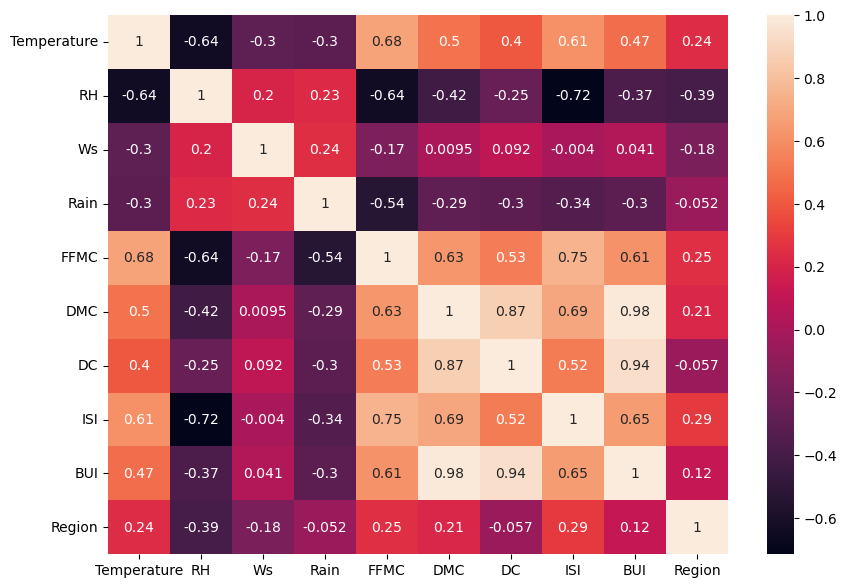

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(), annot=True)

In [28]:
def correlation(dataset, thresold):
    col_corr = set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>thresold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
drop_col=correlation(X_train,0.85)

C:\Users\preet\AppData\Local\Temp\ipykernel_12652\1479136165.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


In [32]:
X_train.drop(drop_col, axis=1, inplace=True)
X_test.drop(drop_col, axis=1, inplace=True)

In [33]:
X_train.shape, X_test.shape

((170, 9), (73, 9))

In [34]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

C:\Users\preet\AppData\Local\Temp\ipykernel_12652\4269234658.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Training Data After Normalization')

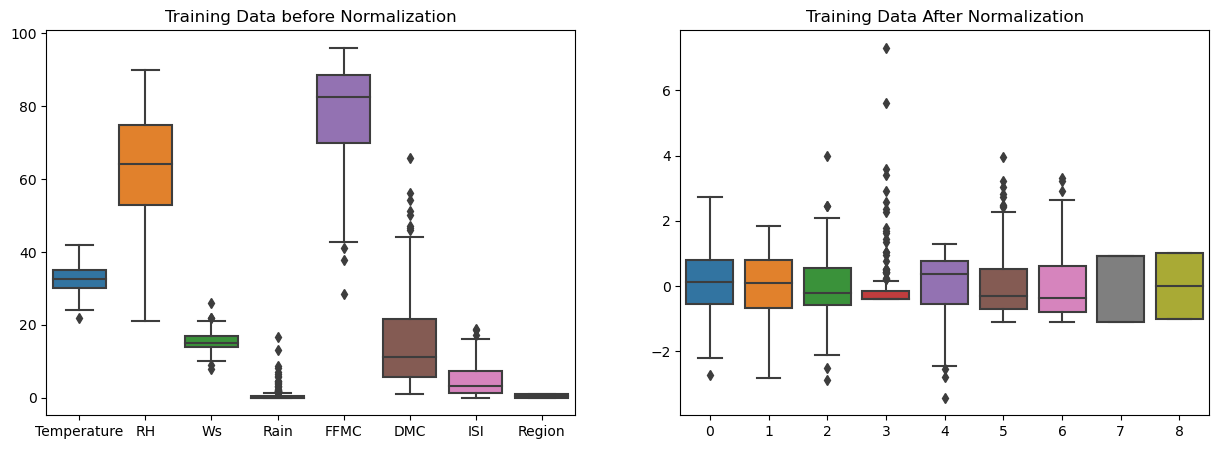

In [39]:
# Visualizing scaled data
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Training Data before Normalization')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('Training Data After Normalization')

## Model Training

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [48]:
ypred=model.predict(X_test_scaled)

In [50]:
# Performace of model 
score = mean_absolute_error(y_test,ypred)
print("Mean Absolute error is:",score)

0.5648036371485071


In [51]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test,ypred)
print("R2 Score is:", score1)

R2 Score is: 0.9847206874554418


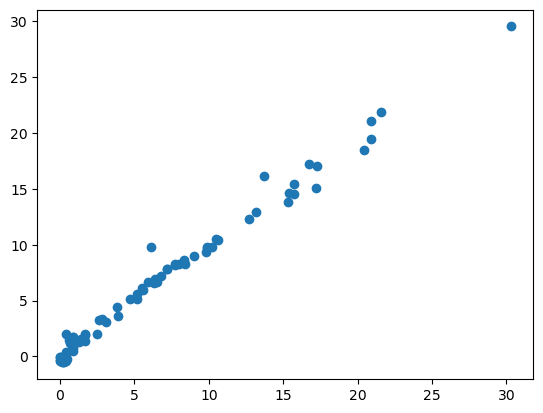

In [52]:
plt.scatter(y_test,ypred)

Mean Absolute error is: 1.1203368882393199
R2 Score is: 0.9511364350928344


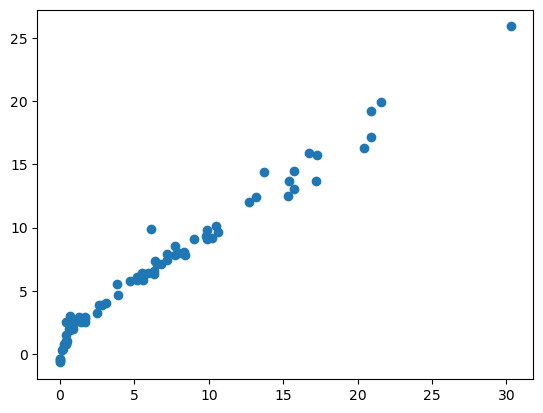

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
model_lasso = Lasso()
model_lasso.fit(X_train_scaled,y_train)
ypred=model_lasso.predict(X_test_scaled)
# Performace of model 
score = mean_absolute_error(y_test,ypred)
print("Mean Absolute error is:",score)
from sklearn.metrics import r2_score
score1 = r2_score(y_test,ypred)
print("R2 Score is:", score1)
plt.scatter(y_test,ypred)

Mean Absolute error is: 0.5844876727578057
R2 Score is: 0.9841610358272455


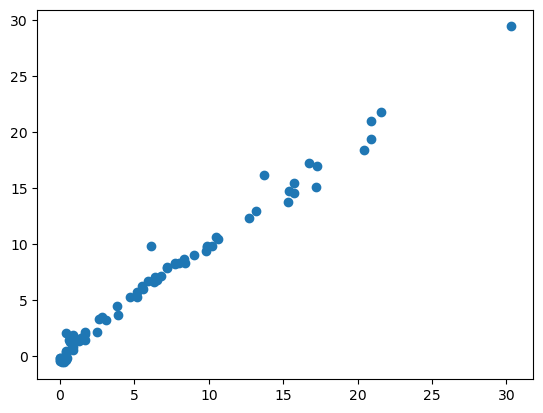

In [54]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
model_ridge = Ridge()
model_ridge.fit(X_train_scaled,y_train)
ypred=model_ridge.predict(X_test_scaled)
# Performace of model 
score = mean_absolute_error(y_test,ypred)
print("Mean Absolute error is:",score)
from sklearn.metrics import r2_score
score1 = r2_score(y_test,ypred)
print("R2 Score is:", score1)
plt.scatter(y_test,ypred)

Mean Absolute error is: 1.8554687479717549
R2 Score is: 0.8804077479376988


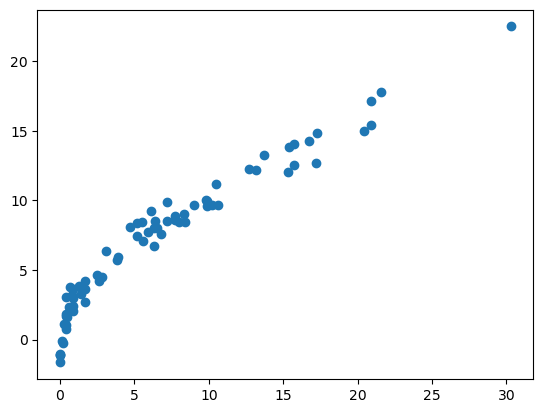

In [55]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
model_en = ElasticNet()
model_en.fit(X_train_scaled,y_train)
ypred=model_en.predict(X_test_scaled)
# Performace of model 
score = mean_absolute_error(y_test,ypred)
print("Mean Absolute error is:",score)
from sklearn.metrics import r2_score
score1 = r2_score(y_test,ypred)
print("R2 Score is:", score1)
plt.scatter(y_test,ypred)

## Cross validation using LassoCV and RidgeCV

Mean Absolute error is: 0.6356015744517419
R2 Score is: 0.9821627684487946


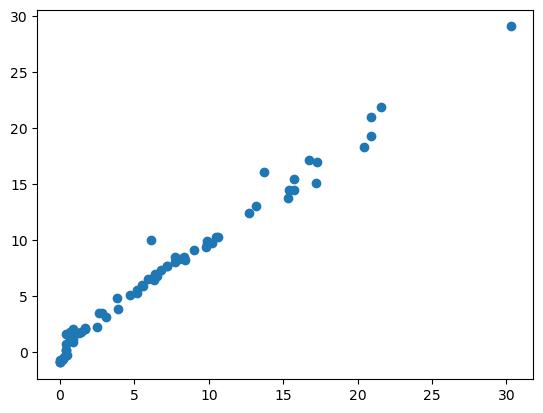

In [58]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
model_lassocv = LassoCV(cv=5)
model_lassocv.fit(X_train_scaled,y_train)
ypred=model_lassocv.predict(X_test_scaled)
# Performace of model 
score = mean_absolute_error(y_test,ypred)
print("Mean Absolute error is:",score)
from sklearn.metrics import r2_score
score1 = r2_score(y_test,ypred)
print("R2 Score is:", score1)
plt.scatter(y_test,ypred)

In [60]:
model_lassocv.alpha_

0.06177603120682054

In [61]:
model_lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [63]:
model_lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

Mean Absolute error is: 0.7943132619521942
R2 Score is: 0.9762231929195329


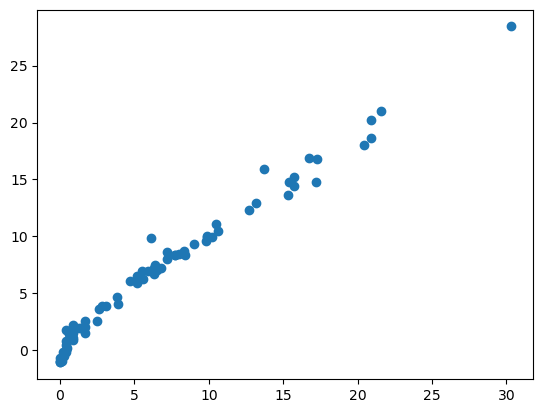

In [64]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
model_ridgecv = RidgeCV(cv=5)
model_ridgecv.fit(X_train_scaled,y_train)
ypred=model_ridgecv.predict(X_test_scaled)
# Performace of model 
score = mean_absolute_error(y_test,ypred)
print("Mean Absolute error is:",score)
from sklearn.metrics import r2_score
score1 = r2_score(y_test,ypred)
print("R2 Score is:", score1)
plt.scatter(y_test,ypred)

In [65]:
model_ridgecv.intercept_

7.12764705882353

In [66]:
model_ridgecv.coef_

array([ 0.01692224, -0.44533072,  0.13652716, -0.03749804, -0.45054823,
        3.58877518,  4.01412425,  0.62284089, -0.32862439])

In [68]:
model_ridgecv.best_score_

0.9471317752584876